In [96]:
# Dependências
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
from librosa import stft

In [114]:
# Obtendo dados
data = np.array([genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/HC_1.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/HC_2.csv', delimiter=',', unpack=True),
                 genfromtxt('./Delsys_8Chans_15Classes/S1-Delsys-15Class/HC_3.csv', delimiter=',', unpack=True)])

print(data.shape)

(3, 8, 80000)


In [98]:
# Segmentando os dados
# Definição do salto e do tamanho do segmento (segmento - salto = sobreposição)
salto = 600
segmento = 800
n_win = int((20000 - segmento) / salto) + 1
ids = np.arange(n_win) * salto
x = np.array([data[:,:,k:(k + segmento)] for k in ids]).transpose(1, 2, 0, 3)
print(x.shape)

(3, 8, 33, 800)


In [99]:
# Domínio do tempo

In [100]:
# Calculando o MAV
print(x.shape)
mav = np.sum(abs(x)/800, axis=-1)
print(mav.shape)

(3, 8, 33, 800)
(3, 8, 33)


In [101]:
# Calculando MAVS
a = np.array(mav[:,:,1:33])
b = np.array(mav[:,:,0:32])

mavs = np.array([elemA - elemB for elemA, elemB in zip(a, b)])
print(mavs.shape)

(3, 8, 32)


In [102]:
# Calculando SSI
print(x.shape)
ssi = np.sum(np.power(abs(x), 2), axis=-1)
print(ssi.shape)
print(ssi[0][0][0])

(3, 8, 33, 800)
(3, 8, 33)
0.0009026024906031025


In [103]:
# Calculando RMS
print(x.shape)
rms = np.sqrt(np.sum((np.power(abs(x), 2))/800, axis=-1))
print(rms.shape)
print(rms[0][0][0])

(3, 8, 33, 800)
(3, 8, 33)
0.0010621925970622644


In [104]:
# Domínio da frequência

In [105]:
# Calculando FFT
# shape: [3 trials, 8 eletrodos, 20000 samples]
print(data[:,:,0:20000].shape)
# Aplicando stft no último eixo de data (2), com janela de 800 e sobreposição de 600
w = np.apply_along_axis(stft, 2, data[:,:,0:19200], n_fft=800, hop_length=600)
w = np.swapaxes(w, 2, 3)
print(w.shape)

(3, 8, 20000)
(3, 8, 33, 401)


In [106]:
# Calculando PSD
psd = np.power(abs(w), 2)
print(psd.shape)

(3, 8, 33, 401)


In [107]:
# Calculando FMD
fmd = np.sum(psd/2, axis=-1)
print(fmd.shape)

(3, 8, 33)


In [116]:
# Calculando FMN

sampleRate = 4000
M = 401
f = np.array([(i*sampleRate)/(2*M) for i in range(1,M+1)])

fmn = np.divide((np.sum(np.multiply(psd,f), axis = -1)), (np.sum(psd, axis=-1)))
    
print(fmn.shape)

(3, 8, 33)


In [134]:
from sklearn import svm
X = [[0, 0], [1, 1], [2, 2], [3, 3]]
y = [0, 1, 2, 3]
clf = svm.SVC(gamma='scale')
clf.fit(X, y)  

clf.predict([[2, 2]])

array([2])

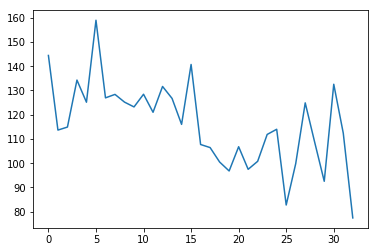

In [113]:
import matplotlib.pyplot as plt
plt.plot(fmn[0][0])
plt.show()